# Statistical Methods (SS18) {-}
## David Bubeck, Henrik Lukas Ruh & Manuel Bayer {-}
## Exercise 9 for August 22, 2018, 9:00 {-}
### Testing hypotheses {-}
#### 9.1 Student’s t-test
On *Moodle* you find a copy of Student’s original paper in which he introduced the t-statistic and the
t-test. On page 20 he starts giving illustrations of his method. Have a look at his *Illustration I*, in
particular the table (it obviously contains a typo in the 5th row).
##### a: What is apparently his null hypothesis? Can you reproduce the odds values that he gives? For that, implement the one-sample t-test yourself, and perform a one-sided test.
Null hypothesis $H_0$: Neither optical isomer 1 nor 2 give increase/decrease of sleep, i.e., it is assumed that the additional hours' sleep gained by the use of the optical isomers determined for the ten patients follow a normal distribution with unknown variance $\sigma^2$ and mean $\mu=0$.

In [10]:
# Additional hours' sleep of patients gained by use of both drugs  
add_hs_sleep1 <- c(.7,-1.6,-.2,-1.2,-.1,3.4,3.7,.8,0,2.0)
add_hs_sleep2 <- c(1.9,.8,1.1,.1,-.1,4.4,5.5,1.6,4.6,3.4)
mean1 <- mean(add_hs_sleep1); mean2 <- mean(add_hs_sleep2) # Means
sd1 <- sd(add_hs_sleep1); sd2 <- sd(add_hs_sleep2) # SDs
mean_diff <- mean(add_hs_sleep2-add_hs_sleep1) # Mean of difference
sd_diff <- sd(add_hs_sleep2-add_hs_sleep1) # SD of difference
mu <- 0 # Mean of null hypothesis
n <- 10 # Number of patients
nu <- n-1 # d.o.f.

# Test statistic
t <- function(samp_mean, samp_sd) sqrt(n)*(samp_mean-mu)/samp_sd

# Print out
cat("p-value = ", pt(t(mean1, sd1), nu, lower.tail=F)*100,
    "% against the evidence of null hypothesis for optical isomer 1.\n")
cat("p-value = ", pt(t(mean2, sd2), nu, lower.tail=F)*100,
    "% against the evidence of null hypothesis for optical isomer 2.\n")
cat("p-value = ", pt(t(mean_diff, sd_diff), nu, lower.tail=F)*100,
    "% wrt null hypothesis that 1 is the better soporific.\n")

p-value =  10.87989 % against the evidence of null hypothesis for optical isomer 1.
p-value =  0.2538066 % against the evidence of null hypothesis for optical isomer 2.
p-value =  0.1416445 % wrt null hypothesis that 1 is the better soporific.


The results above suggest that we could reproduce the given probabilities pretty well, although there is some deviation of the computed probabilty wrt the case that the mean of additional hours' sleep gain by use of isomer 1 is positive which can probably explained by the interpolation he used to calculate these odds.

##### b: In which cases can you reject the null hypothesis with a 1 % significance level? What are the critical values of the t-statistics? What are the corresponding values in terms of $\bar{x}$?
The null hypothesis can be rejected for drug 2 and the case that the drug 1 is a better soporific because p-value $<\alpha=1\%$ significance level. 
Critical values of the t-statistics at $$t_\mathrm{crit}=P^{-1}(\alpha;\nu)$$.

In [13]:
t_crit <- qt(.01,nu,lower.tail=F)
cat("t_crit = ",t_crit,"\n")

t_crit =  2.821438 


The corresponding values in terms of $\bar{x}$ is given by $$\overline{x_\mathrm{crit}}=t_\mathrm{crit}\frac{\hat{\sigma}}{\sqrt{n}}+\mu$$ where $\hat{\sigma}$ is the sample standard deviation.

In [18]:
cat("Substance 1: x_crit = ",t_crit*sd1/sqrt(n)," hours\n")
cat("Substance 2: x_crit = ",t_crit*sd2/sqrt(n)," hours\n")
cat("Difference: x_crit = ",t_crit*sd_diff/sqrt(n)," hours\n")

Substance 1: x_crit =  1.596185  hours
Substance 2: x_crit =  1.78644  hours
Difference: x_crit =  1.097423  hours


##### c: Can you reproduce your result with R’s t.test() function?

In [22]:
# One-sided tests
cat("One-sided test for optical isomer 1\n")
cat("-----------------------------------\n")
t.test(add_hs_sleep1, mu=0, alternative="greater") # Drug 1
cat("One-sided test for optical isomer 2\n")
cat("-----------------------------------\n")
t.test(add_hs_sleep2, mu=0, alternative="greater") # Drug 2
# Paired t-test for difference
cat("Two-sample case\n")
cat("-----------------------------------\n")
t.test(add_hs_sleep2, add_hs_sleep1, paired=T, alternative="greater")

One-sided test for optical isomer 1
-----------------------------------



	One Sample t-test

data:  add_hs_sleep1
t = 1.3257, df = 9, p-value = 0.1088
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -0.2870553        Inf
sample estimates:
mean of x 
     0.75 


One-sided test for optical isomer 2
-----------------------------------



	One Sample t-test

data:  add_hs_sleep2
t = 3.6799, df = 9, p-value = 0.002538
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 1.169334      Inf
sample estimates:
mean of x 
     2.33 


Two-sample case
-----------------------------------



	Paired t-test

data:  add_hs_sleep2 and add_hs_sleep1
t = 4.0621, df = 9, p-value = 0.001416
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.8669947       Inf
sample estimates:
mean of the differences 
                   1.58 


It becomes evident that the p-values are reproduced for the given decimals.

## 9.2 Correlation test: Hubble expansion
Hubble's 1929 discovery of the proportionality between the distance and the recession velocity of galaxies marked the beginning of the era of observational cosmology.

##### a: Generate a perfectly correlated dataset $x_i,y_i$ (e.g. using seq()), and a totally uncorrelated dataset (e.g., using rnorm()). Compute the Spearman rank correlation coefficient $r_S$ for both datasets.

##### A: 
A dataset $x_i,y_i$ is correlated, if a functional dependence between the $x_i$ and $y_i$ exists. The simpelest dependence is a proportionality. For the example implemented below, we obtain a $r_S$ of one, meaning the dataset is positively correlated.
The dataset is uncorrelated, if the $x_i$ and $y_i$  are independant of each other. An independance can be achived by choosing random numbers for the parameters. For the example implemented below, we obtain a $r_S$ of approximately zero, meaning the dataset is uncorrelated.

In [1]:
# generate correlated dataset
size_dataset <- 100
x_cor <- seq(0,1,1/(size_dataset-1))
y_cor <- 2*x_cor

# generate uncorrelated dataset
x_uncor <- rnorm(size_dataset)
y_uncor <- rnorm(size_dataset)

In [2]:
# Spearman rank correlation coefficient 

r_S_fun <- function (x,y){
    N <- length(x)
    r <- 1-6*sum((rank(x)-rank(y))**2)/(N**3-N)
    return(r)
}

In [3]:
# test the correlation

cat('\nCorrelation coefficient of correlated dataset\n-------------------------\n')
r_S_cor <- r_S_fun(x_cor,y_cor)
cat('r_S = ',r_S_cor)

cat('\nCorrelation coefficient of uncorrelated dataset\n-------------------------\n')
r_S_uncor <- r_S_fun(x_uncor,y_uncor)
cat('r_S = ',r_S_uncor)


Correlation coefficient of correlated dataset
-------------------------
r_S =  1
Correlation coefficient of uncorrelated dataset
-------------------------
r_S =  0.09821782

##### b: Load the Hubble dataset (file Hubble.dat) into R and compute $r_S$.

##### A: 
The Hubble dataset contains distances and velocities. We obtain a $r_S$ of approximately 0.87. Consequently, the dataset is correlated.

In [4]:
# read in data
data <- read.table("hubble.dat", header=TRUE)

# display the data
data

dist,vel
0.04,111.1
0.03,-83.3
0.19,97.2
0.25,27.8
0.27,-69.4
0.26,-208.3
0.42,819.4
0.50,819.4
0.50,958.3
0.63,666.7


In [5]:
# test the correlation
cat('\nCorrelation coefficient of Hubble dataset\n--------------------------------\n')
r_S_hub <- r_S_fun(data$dist,data$vel)
cat('r_S = ',r_S_hub)


Correlation coefficient of Hubble dataset
--------------------------------
r_S =  0.8717391

##### c: For all three datasets, carry out a test of the null hypthesis that the x and y values are not correlated (use cor.test(x,y,method="spearman")). In the case of the Hubble dataset you get a Warning message - why?

##### A: 
First of all, we observe that the $r_S$ values are similar to the ones that we obtained before. The null hypothesis is thus rejected for datasets one and three, meaning that this datasets are correlated.

The warning message appears to result from some of the distance values appearing multiple times within the data. One possibility is that Hubble was observing galxies of a galaxy cluster. The distances of the cluster are approximately the same, thus the distance appears multiple times.
The problem with this is, that the rank is not unique anymore.

In [6]:
# test the null hypothesis

cat('\nSpearman test of correlated dataset\n----------------------------------\n')
(test_cor <- cor.test(x_cor,y_cor, method="spearman"))

cat('\nSpearman test of uncorrelated dataset\n----------------------------------\n')
(test_uncor <- cor.test(x_uncor,y_uncor, method="spearman"))

cat('\nSpearman test of Hubble dataset\n----------------------------------\n')
(test_hub <- cor.test(data$dist,data$vel, method="spearman"))


Spearman test of correlated dataset
----------------------------------



	Spearman's rank correlation rho

data:  x_cor and y_cor
S = 0, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
rho 
  1 



Spearman test of uncorrelated dataset
----------------------------------



	Spearman's rank correlation rho

data:  x_uncor and y_uncor
S = 150280, p-value = 0.3304
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09821782 



Spearman test of Hubble dataset
----------------------------------


Warning message in cor.test.default(data$dist, data$vel, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  data$dist and data$vel
S = 295.45, p-value = 2.954e-08
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8715442 


##### d: Carry out a test of the null hypothesis that the distances of the 24 galaxies in the Hubble dataset are not correlated with the first 24 Fibonacci numbers. What do you find, and where does this result come from? Hint: To calculate the Fibonacci sequence, e.g. start with a vector c(0,1) and use a for-loop to repeatedly append(...) the sum of the last two entries. Alternatively, instead of the Fibonacci sequence you could also use the prime numbers from the first problem sheet.

##### A: 
We obtain a $r_S$ close to one. Thus, the Fibonacci sequence is correlated with the measured distances, and closer correlated than the measured velocities. On the first sight, this result appears to be suprising. But, taking a look on the data shows, that the distance sequence is sorted by increasing value. This can also seen in the plot below. We therefore expect a correlation with the increasing Fibonacci sequence. On the other hand, the velocity data scatters strongly, presumably due to the peculiar motions of galaxies and measurement uncertainties. Hence, a perfect correlation would be the bigger suprise.

In [7]:
# fibonacci sequence

fibo <- function(length){
    f <- 1:length
    for (i in 1:length){
            if (i == 1){
                f[i] <- 0
            } else if (i == 2){
                f[i] <- 1
            } else {
                f[i] <- f[i-1]+f[i-2]
            }
    }
    return(f)
} 

# test
(fibo(10))

[1]  0  1  1  2  3  5  8 13 21 34

In [8]:
# generate fibonacci set
fibo_seq <- fibo(24)

In [9]:
# test the null hypothesis

cat('\nSpearman test of Hubble distances with Fibonacci sequence\n-----------\n')
(test_hub <- cor.test(data$dist,fibo_seq, method="spearman"))


Spearman test of Hubble distances with Fibonacci sequence
-----------


Warning message in cor.test.default(data$dist, fibo_seq, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  data$dist and fibo_seq
S = 18.527, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9919449 


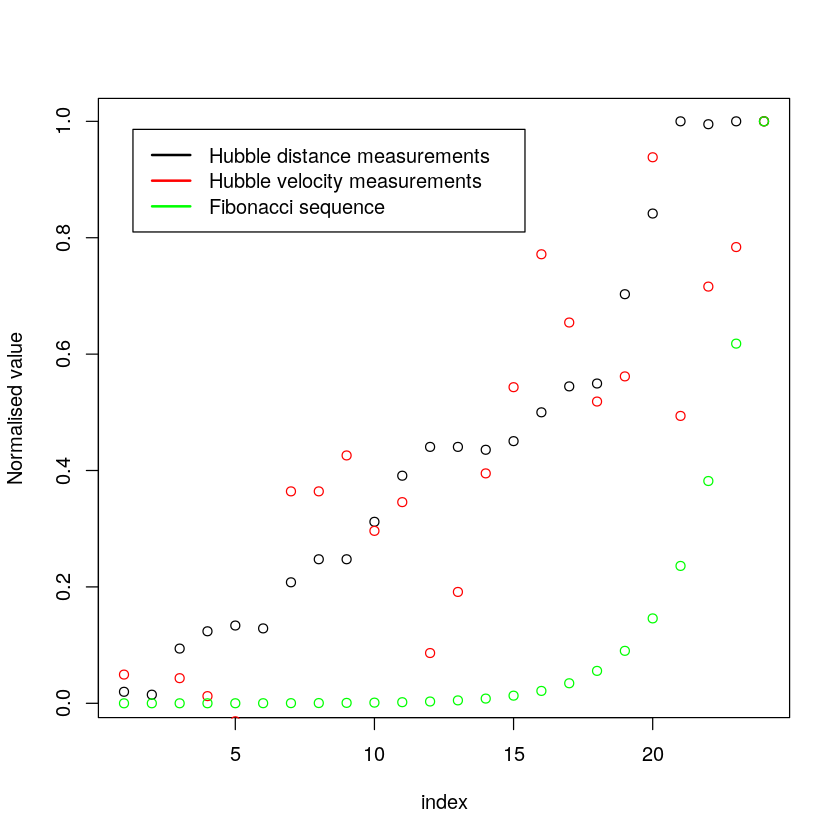

In [30]:
# plot the data against the index
# the sequences are normalised to their maximum values

index <- 1:24
plot(index,data$dist/max(data$dist),ylab='Normalised value')
points(1:24,data$vel/max(data$vel),col='red')
points(1:24,fibo_seq/max(fibo_seq),col='green')

# legend
legend("topleft", legend=c('Hubble distance measurements',
                           'Hubble velocity measurements','Fibonacci sequence'),
       inset=.05, 
       lwd=2, col=c('black','red','green'))

### 9.3 Bayesian model comparison: Is there evidence for a non-zero gradient?

This exercise is a copy of the problem discussed in section 11.3 in the book of Coryn Bailer-Jones (see book chapter on Moodle). Read the section, and re-do the model comparison described there!
Different from the problem in the section, the files gradient10.dat and gradient50.dat (see Moodle) contain new $(x, y)$ data sets for the (in 
total five each) lines to be analyzed. The coefficients of the straight lines have changed a little bit, and are kept secret here. However, the priors that Coryn specifies are still applicable, except for $a_0$ where $P(a_0) \sim N(1, 1)$ should be used. You are expected to provide your own R-implementation of the problem, but - of course - you can study the code given in the book for inspiration. The result should be similar to what is given in the book. Can you confirm this?

We can evaluate the two models (zero gradient or non-zero gradient) using Bayes factor $B_{12}$,

$$
B_{12} = \frac{P(D|M_1)}{P(D|M_2)},
$$

where $D$ denotes the data, and $M_1$ and $M_2$ the two models. 
The marginal likelihoods for the Bayes factor can be computed numerically, wherein

$$
P(D|M)\approx \frac{1}{N_s} \sum_{l=1}^{l=N_s} P(D|\theta_l,M).
$$

Here, $N_s$ number of samples, and $\theta_l$ are drawn from the respective prior. 

Model 1 is that of a straight line with a zero gadient. Thus,
$$
y = b_0.
$$

The model with a non-zero gradient is given by
$$
y = b_0 + (\mathrm{tan}\ \alpha)x.
$$

Herein, we use a guassian prior for $b_0$ with mean zero and standard deviation zero, and uniform priors for $\alpha$ in $[-\pi/2,\pi/2]$ and the logarithm of the standard deviation of the gaussian likelihood function $\log \sigma$. 

In [2]:
## read in data
grad10 <- read.table("gradient10.dat", header=TRUE)
grad50 <- read.table("gradient50.dat", header=TRUE)

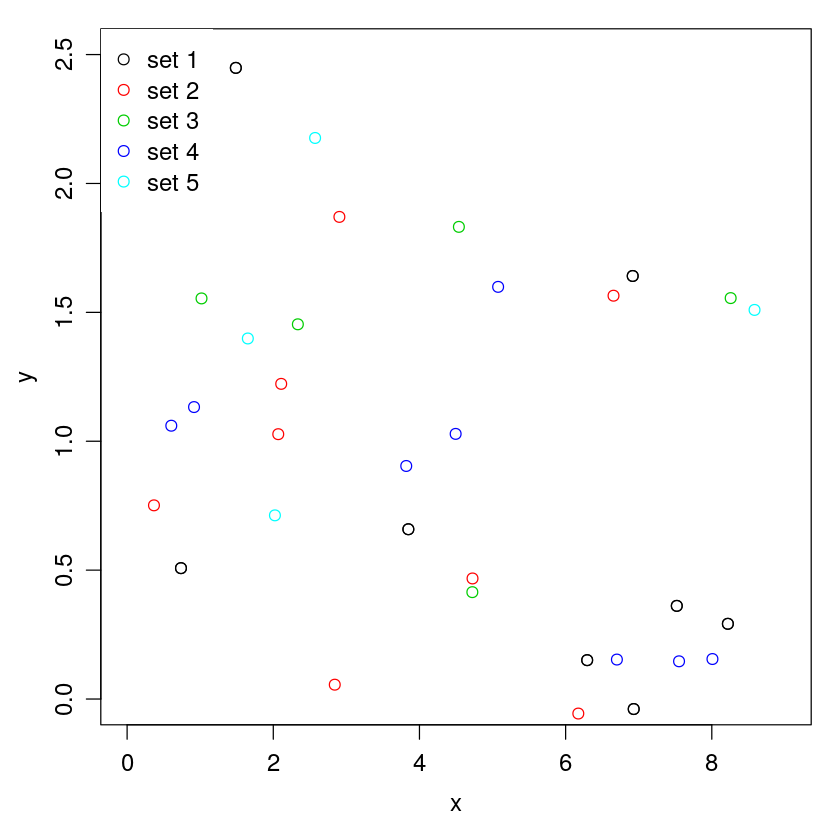

In [5]:
## plot data

# gradient 10 
par(mfrow=c(1,1), mar=c(3.5,3.0,0.5,0.5), oma=0.5*c(1,1,1,1), 
    mgp=c(2.2,0.8,0), cex=1.2)

plot(grad10$x1,grad10$y1,xlim=c(0,9),ylim=c(0,2.5),xlab='x',ylab='y')

for (i in 1:5){
    points(grad10[,2*i-1],grad10[,2*i],col=i)
}

legend("topleft", legend=c("set 1","set 2","set 3","set 4","set 5"),
       col=c(1,2,3,4,5), box.lty=0, pch=1)

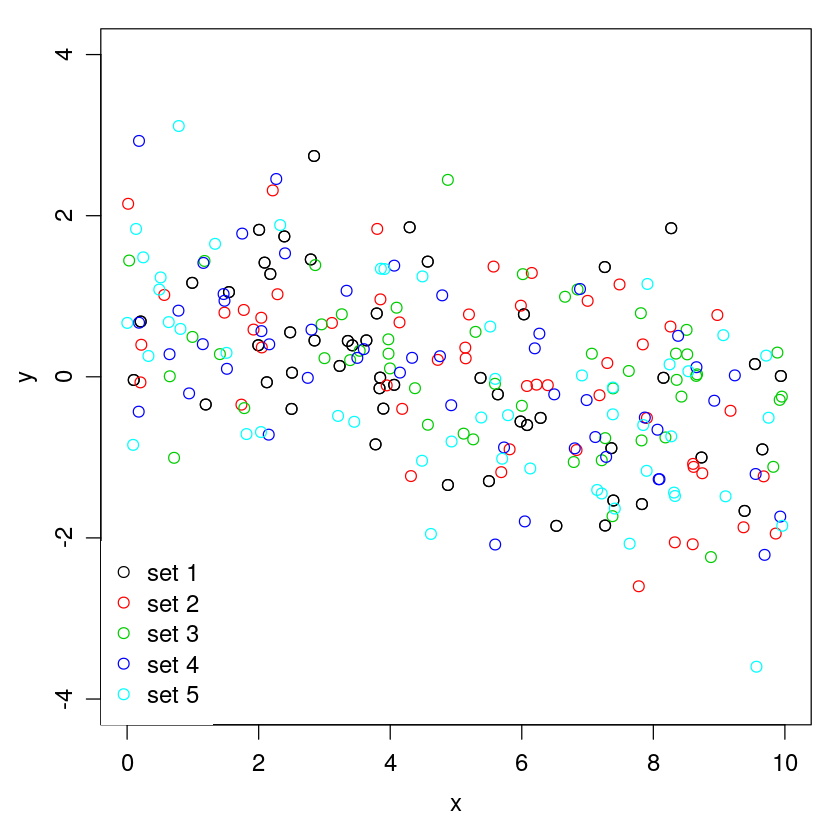

In [6]:
# gradient 50 
par(mfrow=c(1,1), mar=c(3.5,3.0,0.5,0.5), oma=0.5*c(1,1,1,1), 
    mgp=c(2.2,0.8,0), cex=1.2)

plot(grad50$x1,grad50$y1,xlim=c(0,10),ylim=c(-4,4),xlab='x',ylab='y')

for (i in 1:5){
    points(grad50[,2*i-1],grad50[,2*i],col=i)
}

legend("bottomleft", legend=c("set 1","set 2","set 3","set 4","set 5"),
       col=c(1,2,3,4,5), box.lty=0, pch=1)

In [17]:
# likelihood function 
marginal_likelihood <- function(sample){
    sum(sample)/length(sample)
}

# Bayes factor
bayes_factor <- function(mlh1,mlh2){
    mlh1/mlh2
}

# straight line
line <- function(b0,a,x){
        b0 + tan(a)*x
}

# likelihood model 1
lh_m1 <- function(x,y,paras){
    b0 <- paras[1]
    s <- 10**paras[3]
    return(prod((s*(2*pi)**0.5)**-1*exp(-(y-b0)**2*0.5*s**-2)))
}

# ikelihood model 2
lh_m2 <- function(x,y,paras){
    b0 <- paras[1]
    a <- paras[2]
    s <- 10**paras[3]
    return(prod((s*(2*pi)**0.5)**-1*exp(-(y-line(b0,a,x))**2*0.5*s**-2)))
}

In [18]:
# generate random samples drawn from the prior
# samples for b_0, alpha, log10(sigma)

set.seed(100)
Nsamp <- 1e5 # number of samples
priorSamp <- cbind(rnorm(n=Nsamp, mean=1, sd=1), 
                   runif(n=Nsamp, min=-pi/2, max=pi/2),
                   runif(n=Nsamp, min=log10(0.5), max=log10(2)))

In [19]:
#### compute marginal likelihoods for gradient 10 set

# model 1
mlhs10_m1 <- 1:5

# model 2
mlhs10_m2 <- 1:5

for (i in 1:5){
    mlhs10_m1[i] <- marginal_likelihood(apply(priorSamp,1,lh_m1,x=grad10[,2*i-1],
                                              y=grad10[,2*i]))
    mlhs10_m2[i] <- marginal_likelihood(apply(priorSamp,1,lh_m2,x=grad10[,2*i-1],
                                              y=grad10[,2*i]))
}

#### bayes factor for gradient 10 set
bf10 <- bayes_factor(mlhs10_m1,mlhs10_m2)

#### compute marginal likelihoods for gradient 50 set

# model 1
mlhs50_m1 <- 1:5

# model 2
mlhs50_m2 <- 1:5

for (i in 1:5){
    mlhs50_m1[i] <- marginal_likelihood(apply(priorSamp,1,lh_m1,x=grad50[,2*i-1],
                                              y=grad50[,2*i]))
    mlhs50_m2[i] <- marginal_likelihood(apply(priorSamp,1,lh_m2,x=grad50[,2*i-1],
                                              y=grad50[,2*i]))
}

#### bayes factor for gradient 50 set
bf50 <- bayes_factor(mlhs50_m1,mlhs50_m2)

In [20]:
# print results
cat("BF_12           | ", "1     2     3     4     5", "\n")
cat("-------------------------------------------------", "\n")
cat("gradient10 set  | ", round(bf10,3), "\n")
cat("gradient50 set  | ", round(bf50,3), "\n")

BF_12           |  1     2     3     4     5 
------------------------------------------------- 
gradient10 set  |  3.485 2.213 4.057 0.973 0.755 
gradient50 set  |  0.052 0.001 0.861 0 0.001 


From the obtained results above follows that we can confirm the conclusions in the book of Coryn Bailer-Jones since the inclusion of more data points per set suggest that model $M_2$ describes the data better as all computed Bayes factors except for the third set have values smaller than 1/10 wrt the sets with 50 data points which is significant to prefer a model. Analagously, all sets with 10 data points have Bayes factor bigger than 1/10 which prefers the horizontal line as correct model.

#### 9.4 Laterality among physicists
##### a: Perform Fisher’s exact test. Is there a connection between handedness and footedness?
To peform the Fisher's exact test, we can use the R function dhyper(x, m, n, k). For this we can think about the left-footed value as white balls and the right-footed values as black balls. The x parameter of this function represents the white balls drawn whitout replacement. m is the number of white balls and n the number of black balls respectively. The parameter k represents the drawn number.

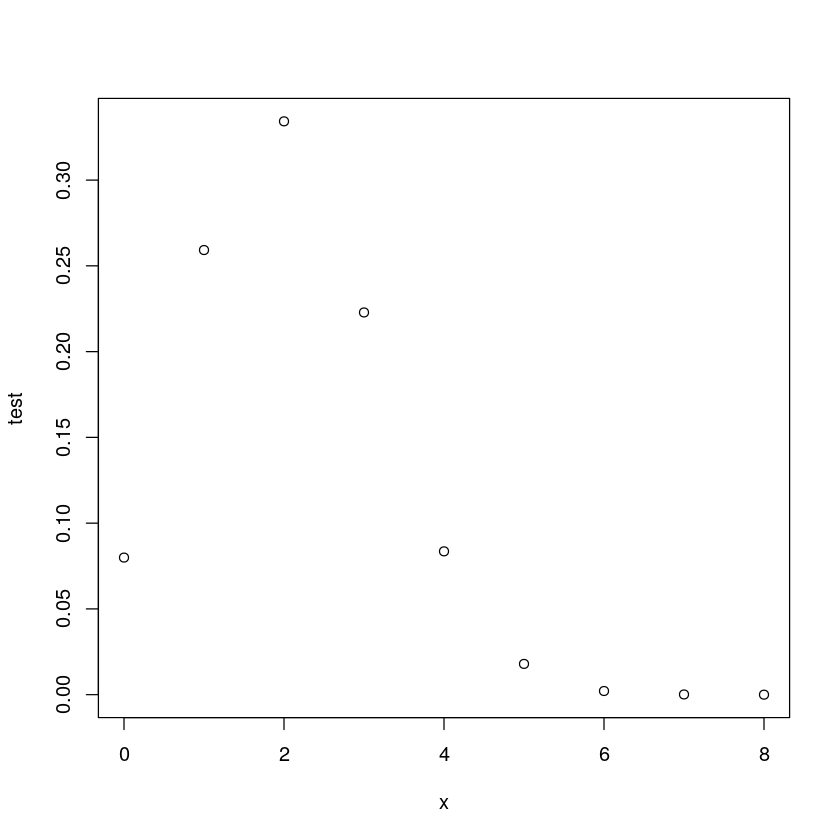

In [7]:
test <- dhyper(seq(0, 8), 15, 44, 8)
plot(0:8, test, xlab="x")

As we can see the maximum of the curve is at 2. For this value the p-value can get higher and is therefore the value for our null hypothesis. We can also calculate the p-value with the Fisher's exact test with the build-in function.

In [22]:
ma <- matrix(c(2, 13, 6, 38), ncol = 2, byrow = TRUE)

fisher.test(ma)


	Fisher's Exact Test for Count Data

data:  ma
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.08602033 6.39841534
sample estimates:
odds ratio 
 0.9747855 


As we can see, we get a p-value of 1, which represents that handiness and footiness are absolutly independent of each other. The p-value of 1 in this case is rather extreme and it is more likely a rounded value, because 1 do not occur.

##### b: Can one say something about preferences if one restricts oneself to the subgroups of left-handed and right-handed persons?
No, we cannot say somthing about the preference if one restricts to the subgroups of the handiness. The reason is, that the handiness and footiness are independent as shown above. Furthermore, the probability which is given by the hypergeometric distribution is equal for both columns. This we can represent by

| -              | left-handed   | right-handed  |-   |
| ------------- |:-------------:| -------------:| :-------------: |
| left-footed   | a (2)         | b (13)        | a + b (15) |
| right-footed  | c (6)         | d (38)        | c + d (44) |
| -              | a + c (8)     | b + d (51)    | a + b + c + d (59)|


$$p = \frac{ \displaystyle{{a+b}\choose{a}} \displaystyle{{c+d}\choose{c}} }{ \displaystyle{{n}\choose{a+c}} } = \frac{ \displaystyle{{a+b}\choose{b}} \displaystyle{{c+d}\choose{d}} }{ \displaystyle{{n}\choose{b+d}} }$$

##### 9.5 Central limit theorem and Kolmogorov–Smirnov
During the lectures you checked the convergence towards a normal distribution according the central
limit theorem by a $\chi^2$-test. Do this now with the Kolmogorov–Smirnov test (making use of ks.test() available in R)!


	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.058377, p-value < 2.2e-16
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.013264, p-value = 0.05927
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.0095654, p-value = 0.3195
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.012821, p-value = 0.07468
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.0098447, p-value = 0.287
alternative hypothesis: two-sided

----------------------------------------------
	One-sample Kolmogorov-Smirnov test

data:  sampleMean
D = 0.0093252, p-value = 0.3494
alternative hypothesis: two-sided

---------------------------------

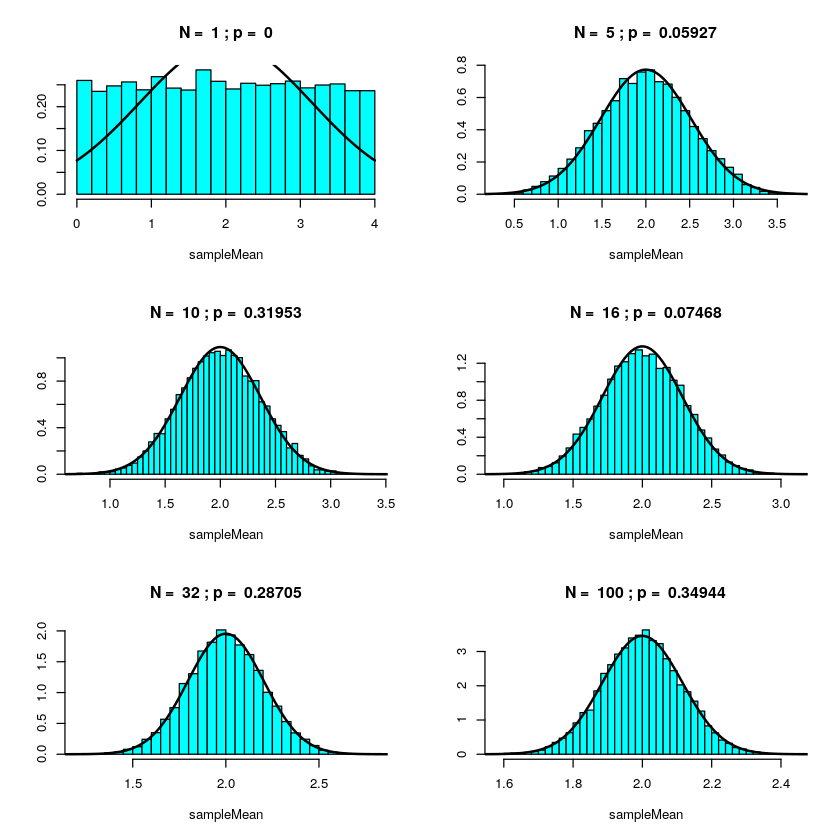

In [23]:
library("MASS")

set.seed(123) # set the seed for reproducibility
sets <- 10000 # set of samples

N <- c(1, 5, 10, 16, 32, 100) # number of samples

# uniform distribution
# limits for uniform distribution (using same values like in the exercise before)
a <- 0
b <- 4
# calculate mean and variance of uniform distribution
mu = 0.5 * (a + b)
var = (b - a)^2 / 12

# png("ksTest.png")
p <- par(mfrow = c(3, 2))
for (i in N) {
    # produce a matrix of samples and build row mean
    samples <- matrix(runif(sets * i, a, b), nrow = sets, ncol = i)
    sampleMean <- rowMeans(samples)
    # calculate standard deviation
    sd = sqrt(var)/sqrt(i)
    
    # apply kolmogorov smirnov test
    test <- ks.test(sampleMean, "pnorm", mu, sd)
    print(test)
    cat("----------------------------------------------")

    # plotting
    truehist(sampleMean, main = paste("N = ", i, "; p = ", round(test$p.value, 5)))
    # overplot a normal distribution
    x <- seq(0, 4, length = 1000)
    lines(x, dnorm(x, mu, sd), lwd = 2)
}
par(p)

In case of $N = 0$ the null hypothesis can be rejected that is why we can conclude that we have no underlying normal distribution. For $N > 5$ we can see that the p value of the Kolmogorov-Smirnov test increases with increasing N. Therefore, (for $p \geq 0.05$) the null hypothesis cannot be rejected and we can assume that we have a underlying normal distribution. Furthermore, for $N = 100$ we have the highest p value and therefore the best fit with our underlying normal distribution with our sample. Seeing this, we can conclude that the central limit theorem is valid.